### Import Libary

In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#  Data PreProcessing

### Data Loading

In [2]:
# Define folders containing data

folders = [
    './shape_recognision/shapes/star/',
    './shape_recognision/shapes/circle/',
    './shape_recognision/shapes/square/',
    './shape_recognision/shapes/triangle/'
]


In [3]:
# Definition of labels corresponding to each category of shapes

class_labels = {
    'star': 0,
    'circle': 1,
    'square': 2,
    'triangle': 3
}


In [4]:
# Prepare lists to store images and labels

X_train_all = []
y_train_all = []


In [5]:
# Ring for uploading images and preparing labels

for folder in folders:
    label = class_labels[os.path.basename(folder.rstrip('/'))]
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).resize((10, 10))  #  Resize the image
            X_train_all.append(np.array(img).reshape(1, 10 * 10))  # Add image to list
            y_train_all.append(label)  # Add label to list


img.show()

In [6]:
img

In [7]:
# Convert lists to numpy arrays for easier use in the model

X_train_all = np.vstack(X_train_all)
y_train_all = np.array(y_train_all)


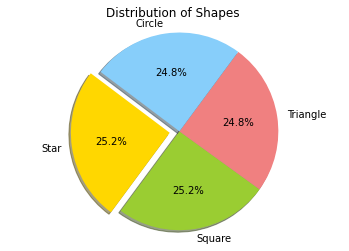

In [9]:
import matplotlib.pyplot as plt

#  
count_star = 3765
count_square = 3765
count_triangle = 3720
count_circle = 3720
total = 14970

# %
percent_star = (count_star / total) * 100
percent_square = (count_square / total) * 100
percent_triangle = (count_triangle / total) * 100
percent_circle = (count_circle / total) * 100


labels = ['Star', 'Square', 'Triangle', 'Circle']
sizes = [percent_star, percent_square, percent_triangle, percent_circle]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=143)

plt.axis('equal') 
plt.title('Distribution of Shapes ')
plt.show()


In [10]:
X_train_all.shape

(14970, 100)

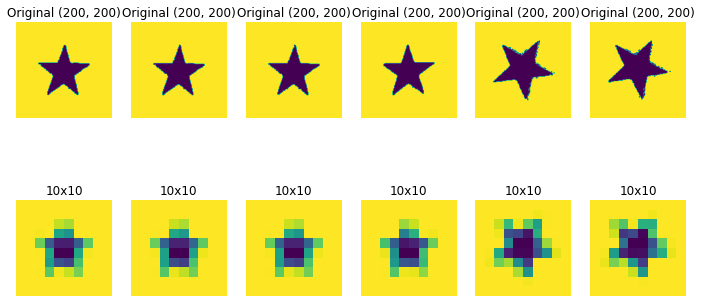

In [11]:
# Display multiple original and resized images

num_images_to_show = 6
plt.figure(figsize=(12, 6))

image_count = 0
for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith('.png') and image_count < num_images_to_show:
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            original_size = img.size
            resized_img = img.resize((10, 10))
            
            plt.subplot(2, num_images_to_show, image_count + 1)
            plt.imshow(img)
            plt.title(f"Original {original_size}")
            plt.axis('off')
            
            plt.subplot(2, num_images_to_show, num_images_to_show + image_count + 1)
            plt.imshow(resized_img)
            plt.title("10x10")
            plt.axis('off')
            
            image_count += 1
        if image_count >= num_images_to_show:
            break
    if image_count >= num_images_to_show:
        break
plt.savefig('resize.png')
plt.show()

### Missing Values

In [12]:
#Check for NaN in X_train_all

nan_in_X_train_all = np.isnan(X_train_all).any()
nan_in_y_train_all = np.isnan(y_train_all).any()

# Check for NaN in y_train_all

none_in_y_train_all = (y_train_all == None).any()

# Check for infinite values  in X_train_all

inf_in_X_train_all = np.isinf(X_train_all).any()
inf_in_y_train_all = np.isinf(y_train_all).any()

print(f"NaN in X_train_all: {nan_in_X_train_all}")
print(f"NaN in y_train_all: {nan_in_y_train_all}")
print(f"None in y_train_all: {none_in_y_train_all}")
print(f"Inf in X_train_all: {inf_in_X_train_all}")
print(f"Inf in y_train_all: {inf_in_y_train_all}")


NaN in X_train_all: False
NaN in y_train_all: False
None in y_train_all: False
Inf in X_train_all: False
Inf in y_train_all: False


### Data Split

In [13]:
#  Train _ Test

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=42)

# Train _ Validation

X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

# Shape

print(f"Shape of X_train: {X_train.shape}\t \t   y_train: {y_train.shape}")
print(f"Shape of X_valid: {X_valid.shape}\t\t    y_valid: {y_valid.shape}")
print(f"Shape of X_test: {X_test.shape}\t \t    y_test: {y_test.shape}")

Shape of X_train: (5613, 100)	 	   y_train: (5613,)
Shape of X_valid: (5614, 100)		    y_valid: (5614,)
Shape of X_test: (3743, 100)	 	    y_test: (3743,)


In [14]:
#  Data Normalization

# X_train = X_train.astype("float32") / 255

X_train= X_train / 255.0
X_test= X_test / 255.0
X_valid= X_valid / 255.0

## one-hot encoded

In [15]:
# Convert numeric labels to one-hot encoded vectors

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_valid.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of y_train: (5613, 4)
Shape of y_val: (5614, 4)
Shape of y_test: (3743, 4)


### Model Building
#### Activation Function
#### Layer Number
#### Nuerons Number
#### Optimizer

In [16]:
# Instantiate the model
model = Sequential()

# Build the model

num_classes = 4

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))   # For 4 categories

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


### Optimizer

In [18]:
# model.compile(optimizer="rmsprop",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

### Training Model

In [19]:
training_results = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100,batch_size=400)

Epoch 1/100
15/15 [==============================] - 5s 76ms/step - loss: 1.2154 - accuracy: 0.5086 - val_loss: 1.0294 - val_accuracy: 0.4971
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 0.9180 - accuracy: 0.5377 - val_loss: 0.7834 - val_accuracy: 0.6416
Epoch 3/100
15/15 [==============================] - 0s 16ms/step - loss: 0.7016 - accuracy: 0.6930 - val_loss: 0.6104 - val_accuracy: 0.7834
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.5600 - accuracy: 0.7796 - val_loss: 0.5186 - val_accuracy: 0.8659
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 0.4589 - accuracy: 0.8407 - val_loss: 0.4231 - val_accuracy: 0.8384
Epoch 6/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3768 - accuracy: 0.8724 - val_loss: 0.3343 - val_accuracy: 0.8573
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3082 - accuracy: 0.8874 - val_loss: 0.2957 - val_accuracy: 0.8988
Epoch 

In [20]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots()

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.xlim([0, 20])
#     plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.savefig('plot_results.png')
    plt.show()
    plt.close()

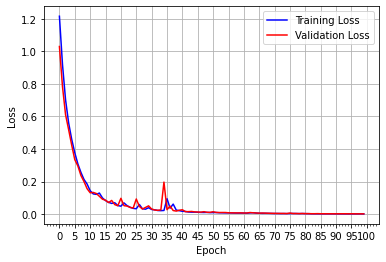

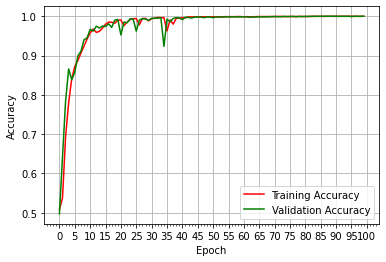

In [21]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
#             ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["b", "r"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
#             ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["r", "g"])

##  Predict
## Model Evaluation

In [22]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(4):
    print('digit:', i, ' probability: ', predictions[index][i]*100)

117/117 [==============================] - 1s 3ms/step
Ground truth for test digit:  [0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  1.408509697764515e-08
digit: 1  probability:  99.9979317188263
digit: 2  probability:  0.002064193722617347
digit: 3  probability:  1.8458138351107323e-07


In [23]:
a=X_test[0].reshape(1,10*10)
a=a/255.0

In [24]:
model.predict(a)

1/1 [==============================] - 0s 45ms/step


array([[0.25116873, 0.1872228 , 0.32728806, 0.2343205 ]], dtype=float32)

In [25]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

117/117 [==============================] - 0s 4ms/step


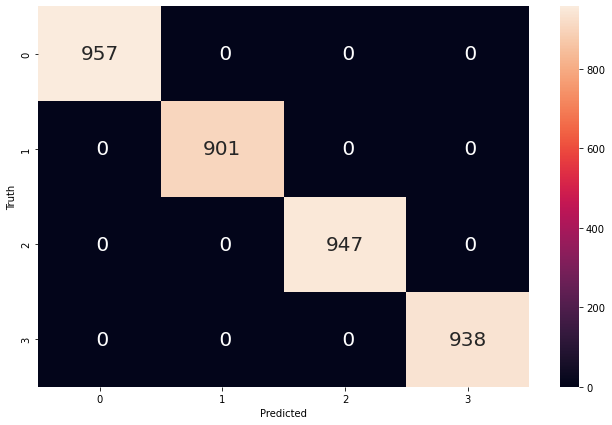

In [26]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[11, 7])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='2g', annot_kws={"size": 20})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion.png')
plt.show()

In [28]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

117/117 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Test accuracy: 1.00


In [29]:
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[957,   0,   0,   0],
       [  0, 901,   0,   0],
       [  0,   0, 947,   0],
       [  0,   0,   0, 938]])>

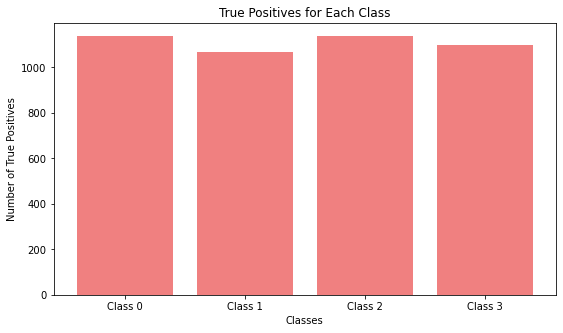

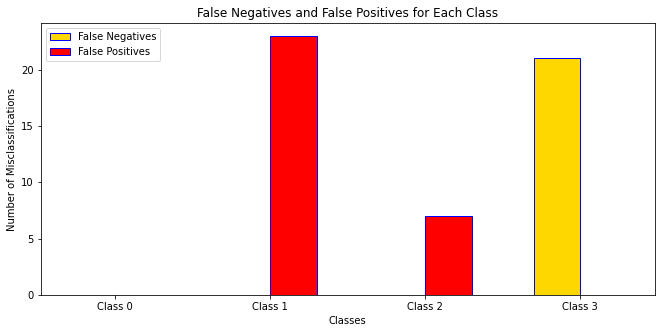

In [30]:
import matplotlib.pyplot as plt
import numpy as np

true_positive = [1137, 1067, 1138, 1098]
false_negative = [0, 0, 0, 21]
false_positive = [0, 23, 7, 0]
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']


plt.figure(figsize=(9, 5))
plt.bar(classes, true_positive, color='lightcoral')
plt.xlabel('Classes')
plt.ylabel('Number of True Positives')
plt.title('True Positives for Each Class')
plt.show()


barWidth = 0.3
r1 = np.arange(len(classes))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(11, 5))
plt.bar(r1, false_negative, color='gold', width=barWidth, edgecolor='b', label='False Negatives')
plt.bar(r2, false_positive, color='red', width=barWidth, edgecolor='b', label='False Positives')

plt.xlabel('Classes')
plt.ylabel('Number of Misclassifications')
plt.title('False Negatives and False Positives for Each Class')
plt.xticks([r + barWidth/2 for r in range(len(classes))], classes)
plt.legend()
plt.show()


In [31]:
num_samples = len(X_train_all)
num_samples

14970

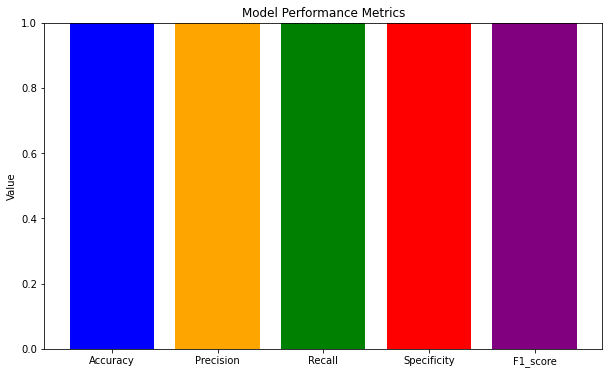

{'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'Specificity': 1.0,
 'F1_score': 1.0}

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix
cm = np.array([[957, 0, 0, 0],
               [0, 901, 0, 0],
               [0, 0, 947, 0],
               [0, 0, 0, 938]])

# True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Calculations
Accuracy = np.sum(TP) / np.sum(cm)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Specificity = TN / (TN + FP)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

# Metrics
metrics = {
    "Accuracy": Accuracy,
    "Precision": np.mean(Precision),
    "Recall": np.mean(Recall),
    "Specificity": np.mean(Specificity),
    "F1_score": np.mean(F1_score)
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.show()

metrics


In [42]:
from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred_proba are the true labels and predicted probabilities
roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC Score:', roc_auc)


ROC-AUC Score: 1.0


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and labels
model = RandomForestClassifier()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         0.99822064 1.         1.         1.
 1.         1.         1.         1.        ]
Mean CV Score: 0.9998220640569395


##  Accuracy Increase

In [32]:
# (Data Augmentation)???

In [33]:
# DataGen???